In [ ]:
## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

- Провести разведочный анализ данных, посмотреть на датасет, есть ли пропуски - посмотреть на зависимости признаков
- Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/margaritakozlova/Downloads/homework_2/descriptive_stats/clients.csv')
data.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [7]:
# Размер датасета 
data.shape

(195, 25)

In [9]:
# Инофрмация по датасету 
# категориальные — пол, тип недвижимости, цель покупки, источник лида
# числовые — возраст, площадь, цена
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [10]:
# Смотрим пропуски данных, их немного
data.isnull().sum()

ID                          0
Building                    0
Year of sale                0
Month of sale               0
Type of property            0
Property number             0
Area (ft.)                  0
Price                       0
Status                      0
Customer ID                 0
Entity                      0
Name                        0
Surname                     0
Age at time of purchase    17
Age Interval               17
Y                          17
M                          17
D                          17
Gender                     17
Country                     0
State                      14
Purpose                     0
Deal satisfaction           0
Mortgage                    0
Source                      0
dtype: int64

In [14]:
# Переведем в метры квадратные 
data['Area (m2)'] = data['Area (ft.)'] * 0.092903

In [16]:
# Смотрим средние значения основных переменных возраста, площади и цены 
data[['Age at time of purchase', 'Area (m2)', 'Price']].describe()

,Age at time of purchase,Area (m2),Price
count,178.000000,195.000000,195.000000
mean,46.151685,83.600356,269434.560923
std,12.841692,24.293164,80129.094465
min,19.000000,38.156191,117564.070000
25%,37.000000,68.735214,212393.250000
50%,45.000000,72.973448,243052.590000
75%,55.000000,99.913460,308550.875000
max,76.000000,180.464078,529317.280000


In [21]:
# Средняя цена 
data['Age at time of purchase'].mean()
data['Area (m2)'].mean()
data['Price'].mean()

np.float64(269434.5609230769)

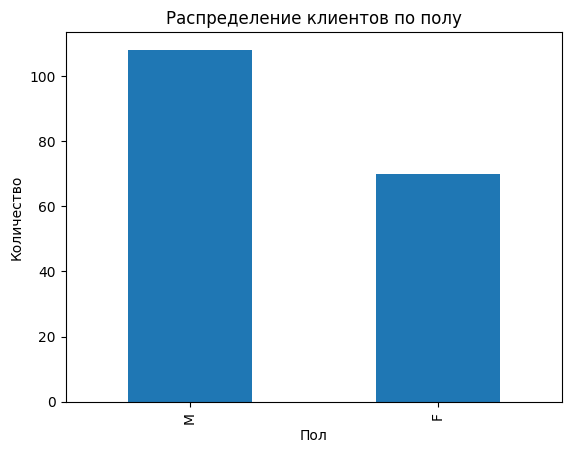

In [23]:
# Распределние клиентов по полу - основная часть - мужчины 
plt.figure()
data['Gender'].value_counts().plot(kind='bar')
plt.title('Распределение клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()


In [88]:
data['Gender'].unique()

array(['F', 'M', nan], dtype=object)

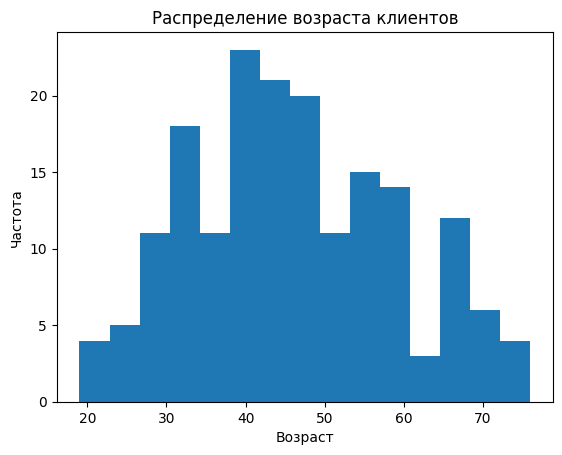

In [24]:
# Распределение по возрасту - Основная масса клиентов — 35–60 лет, Средний возраст: 46.2 года
plt.figure()
data['Age at time of purchase'].dropna().plot(kind='hist', bins=15)
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

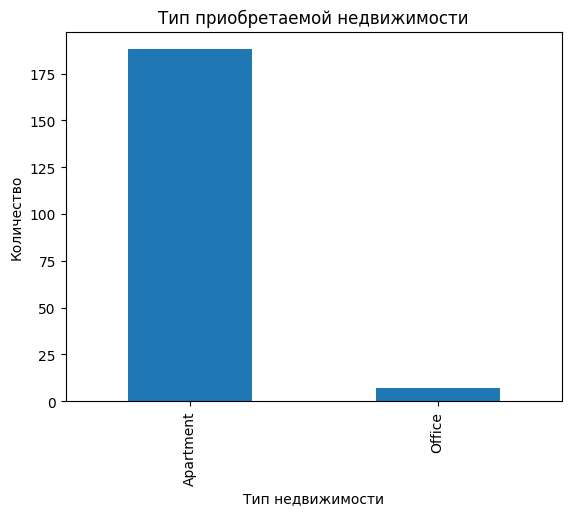

In [25]:
# Тип приобретаемой недвижимости - основная часть - квартиры 
plt.figure()
data['Type of property'].value_counts().plot(kind='bar')
plt.title('Тип приобретаемой недвижимости')
plt.xlabel('Тип недвижимости')
plt.ylabel('Количество')
plt.show()


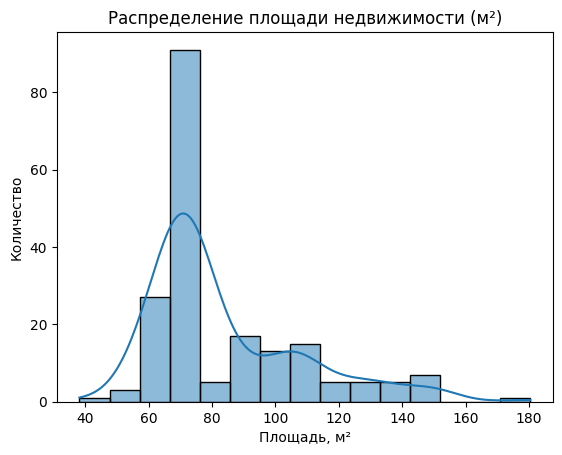

In [64]:
# Размер площади недвижимости - Основной диапазон: 60–90 м². Средняя площадь: 83.6 м²
plt.figure()
sns.histplot(data['Area (m2)'], bins=15, kde=True)
plt.title('Распределение площади недвижимости (м²)')
plt.xlabel('Площадь, м²')
plt.ylabel('Количество')
plt.show()

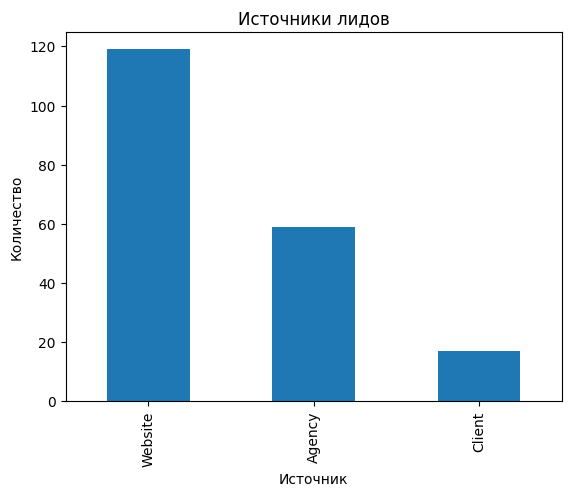

In [27]:
# Распределение лидов. Лид - это потенциальный клиент, оставивший контакт через маркетинговый канал. Большая часть - вебсайты
plt.figure()
data['Source'].value_counts().plot(kind='bar')
plt.title('Источники лидов')
plt.xlabel('Источник')
plt.ylabel('Количество')
plt.show()

In [81]:
# Портрет целевого клиента 
meanAge=round(data['Age at time of purchase'].mean(), 1)
meanPrice=round(data['Price'].mean(), 2)
meanArea=round(data['Area (m2)'].mean(), 1)
mainType=data['Type of property'].mode()[0]
mainSource=data['Source'].mode()[0]
mainGender=data['Gender'].mode()[0]

print (f"Средний возраст: {meanAge}"),
print (f"Средняя площадь (м²): {meanArea}"),
print (f"Средний чек ($): {meanPrice}"),
print (f"Самый покупаемый тип недвижимости: {mainType}"),
print (f"Источник лида: {mainSource}"),
print (f"Пол: {mainGender}")

Средний возраст: 46.2
Средняя площадь (м²): 83.6
Средний чек ($): 269434.56
Самый покупаемый тип недвижимости: Apartment
Источник лида: Website
Пол: M


In [82]:
# Корреляция - Сильная зависимость между ценой и площадью, возраст особого влияния не оказывает. Для прогнозировани я цены надо использовать как основной фактор - площадь, возраст можно опустить
data[['Age at time of purchase', 'Area (m2)', 'Price']].corr()


,Age at time of purchase,Area (m2),Price
Age at time of purchase,1.000000,-0.179692,-0.174893
Area (m2),-0.179692,1.000000,0.941203
Price,-0.174893,0.941203,1.000000


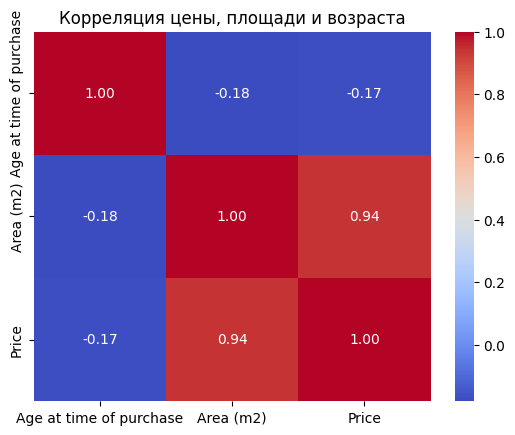

In [46]:
plt.figure()
sns.heatmap(
    data[['Age at time of purchase', 'Area (m2)', 'Price']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Корреляция цены, площади и возраста')
plt.show()

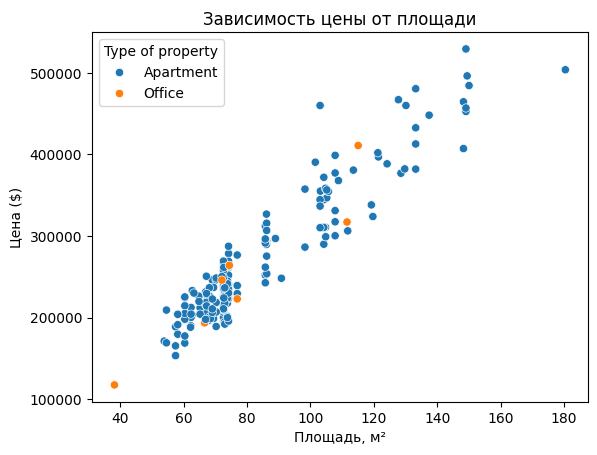

In [35]:
# Зависимость цены от площади - прямая, сильная корреляция, чем больше площадь, тем выше цена
plt.figure()
sns.scatterplot(
    data=data,
    x='Area (m2)',
    y='Price',
    hue='Type of property'
)
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь, м²')
plt.ylabel('Цена ($)')
plt.show()


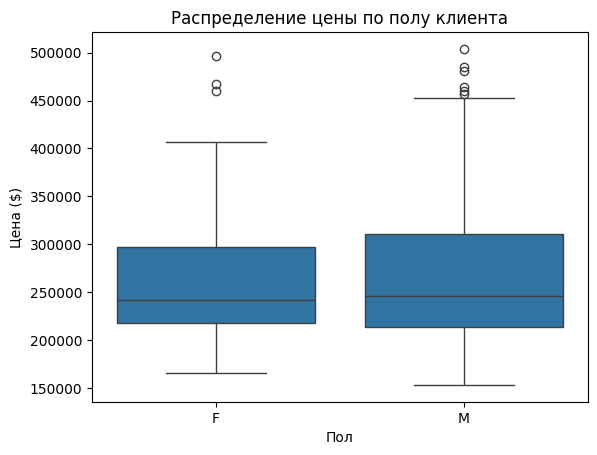

In [36]:
# Распределение цены по полу клиента - мужчины покупали более дорогую недвижимость, средняя цена приобретения от пола не зависит
plt.figure()
sns.boxplot(data=data, x='Gender', y='Price')
plt.title('Распределение цены по полу клиента')
plt.xlabel('Пол')
plt.ylabel('Цена ($)')
plt.show()

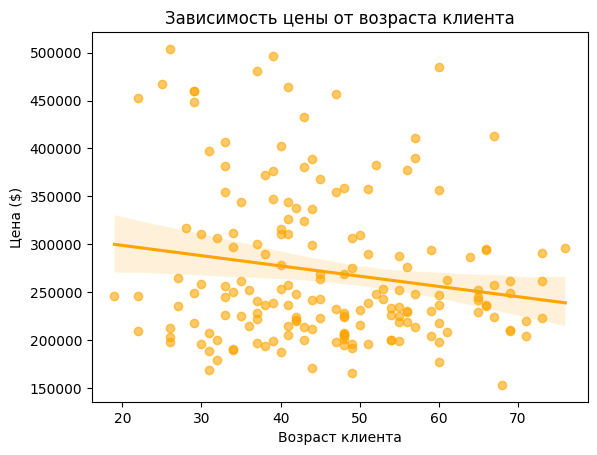

In [44]:
#Зависимость цены от возраста клиента - слабая связь, как и видно было из таблицы корреляции. Возраст влияет на бюджет, но не является ключевым фактором при приобретении недвижимости 
#Цена больше определяется характеристиками объекта, а не клиента
plt.figure()
sns.regplot(
    data=data,
    x='Age at time of purchase',
    y='Price',
    scatter_kws={'alpha': 0.6},
    color='orange'
)
plt.title('Зависимость цены от возраста клиента')
plt.xlabel('Возраст клиента')
plt.ylabel('Цена ($)')
plt.show()

In [85]:
# После анализа можно сделать следующие выводы:
# Веб-сайт - главный источник продаж недвижимости, необходимо усилить маркетинговые кампании именно через него
# Ориентироваться на потенциального клиента мужчского пола возраста 40+
# Больше всего покупают квартиры площадью от 60-80 м2